# Task 1 simple linear regression 

 ## about the data 

#### this data set is about hours studed by the student and thier score, we are going to find the relation between the two variable and then find the regression equation to predict the studend score based on hours studed 

In [1]:
# import nedded libraries
import pandas as pd
import numpy as np 
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

### 1- reading data

In [2]:
# reading data from URL and show the first 5 raws of data
datalink = "http://bit.ly/w-data"
student_ds = pd.read_csv(datalink)
student_ds.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### 2- describtive stat

The decribtive statistics below shows that the data set is a sample of 25 student with two variables hours and scores.
The mean of studing hours is 5.012 with minimum of 1.1 hours and maximum of 9.2 hours of studing.
On the other hand the mean of the sample student score is 51.48 with minimum of 17 and maximum of 95

In [3]:
student_ds.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### 3- data types and missing data detiction 

We can see that tha data has no missing values and the variable hours type is float and score type is ineger and there is no need to make any changes on the data 

In [4]:
student_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### 4- data destribution 

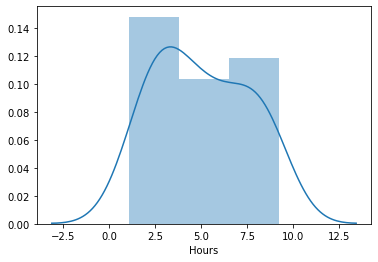

In [5]:
sns.distplot(student_ds['Hours'])

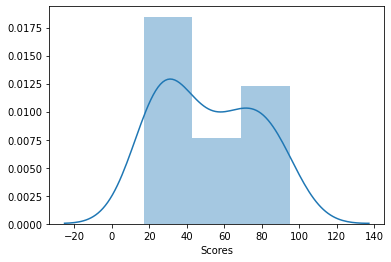

In [6]:
sns.distplot(student_ds['Scores'])

In [7]:
alpha = 0.05
for i in student_ds:
    print([i])
    a,b= stats.shapiro(student_ds[[i]])
    print("test statistic= ", a, "and p-value= ", b)
    if b< alpha:
        print("The null can be rejected")
    else:
        print("The null cannot be rejected")

['Hours']
test statistic=  0.9401376247406006 and p-value=  0.1491180658340454
The null cannot be rejected
['Scores']
test statistic=  0.9168438911437988 and p-value=  0.04343847185373306
The null can be rejected


### 5- corelation 

The correlation matrix and the scotter plot below shows that there is a very strong positve relation between studing hours and student score, which mean that whenever the studing hours increases the student score also increases

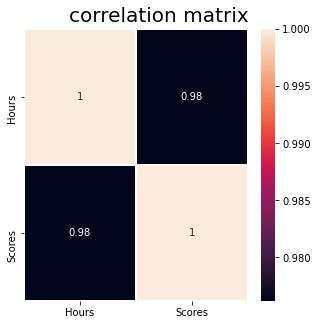

In [8]:
# correlation matrix
corrlation_matrix = plt.subplots(figsize=(5, 5))
corrlation_matrix =sns.heatmap(student_ds.corr(),annot=True, linewidth=0.5)
titel = plt.figtext(0.5,.9,'correlation matrix'.format(a),fontsize=20,ha='center')


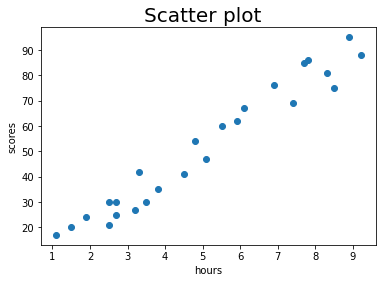

In [9]:
plt.scatter(student_ds['Hours'], student_ds['Scores'])
plt.xlabel('hours')
plt.ylabel('scores')
titel = plt.figtext(0.5,.9,'Scatter plot'.format(a),fontsize=20,ha='center')
plt.show()


### 6-split features and lables

In [10]:
X = student_ds.iloc[:, :-1].values  
y = student_ds.iloc[:, 1].values

### 7-Run the linear regression model

In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2, random_state=0)
model= sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              2579.
Date:                Tue, 08 Mar 2022   Prob (F-statistic):                    6.10e-26
Time:                        09:56:49   Log-Likelihood:                         -78.026
No. Observations:                  25   AIC:                                      158.1
Df Residuals:                      24   BIC:                                      159.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            10.1743      0.200     50.787      0.000       9.761      10.588
==============================================================================
Omnibus:                        4.755   Durbin-Watson:                   1.525
Prob(Omnibus):                  0.093   Jarque-Bera (JB):                2.042
Skew:                          -0.363   Prob(JB):                        0.360
Kurtosis:                       1.803   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 8- model evaluation 

##### a- predection 

In [12]:
# Comparing Actual vs Predicted
trainpred = model.predict(xtrain)
testpred = model.predict(xtest)
prediction= testpred
df = pd.DataFrame({'Actual': ytest, 'Predicted':prediction}) 
df

,Actual,Predicted
0,20,15.261386
1,27,32.557623
2,69,75.289502
3,30,25.435643
4,62,60.028117


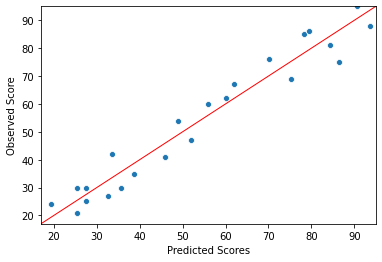

In [13]:
Y_max = y.max()
Y_min = y.min()

ax = sns.scatterplot(x=model.fittedvalues, y=y)
ax.set(ylim=(Y_min, Y_max))
ax.set(xlim=(Y_min, Y_max))
ax.set_xlabel("Predicted Scores")
ax.set_ylabel("Observed Score")

X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()

##### b- residuals plot

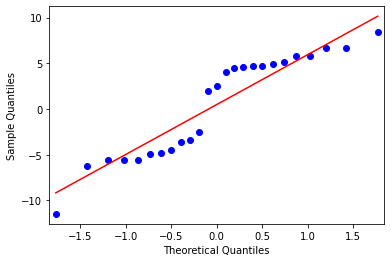

In [14]:
sm.qqplot(model.resid, line='s');

 ##### c- mean square error

In [15]:
print('The mean square error (MSE)=' , mean_squared_error(prediction,ytest))

The mean square error (MSE)= 23.52423131306571
